In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import utils.tools as tl
from utils.mesa_web import read_history, read_profile

warnings.filterwarnings("ignore")

spectral_types = [
    (8, "F2 V"),
    (5, "G8 V"),
    (6, "G2 V"),
    (3, "M0 V"),
    (12, "B3 V"),
    (14, "O9 V"),
    (4, "K5 V"),
    (7, "F8 V"),
    (2, "M6 V"),
    (11, "B9 V"),
    (10, "A0 V"),
    (13, "O5 V"),
    (9, "A5 V"),
    (15, "WN5"),
    (1, "L5"),
]

# %% read spectral atlas data
read_kwargs = dict(delim_whitespace=True, comment="#", usecols=(0, 1), names=["Wavelength", "Flux"])
spectral_atlas_file_list = tl.list_dir("data\\spectral_atlas_data")
print("spectral_atlas_file_list:\n", spectral_atlas_file_list)
spectral_atlas_spectra = tl.read_spectra(
    *spectral_atlas_file_list, normalize_col="Flux", **read_kwargs
)

spectral_atlas_file_list:
 ['c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes\\Fall 2024\\ps401\\finalproject\\data\\spectral_atlas_data\\spectra1.dat', 'c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes\\Fall 2024\\ps401\\finalproject\\data\\spectral_atlas_data\\spectra2.dat', 'c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes\\Fall 2024\\ps401\\finalproject\\data\\spectral_atlas_data\\spectra3.dat', 'c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes\\Fall 2024\\ps401\\finalproject\\data\\spectral_atlas_data\\spectra4.dat', 'c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes\\Fall 2024\\ps401\\finalproject\\data\\spectral_atlas_data\\spectra5.dat', 'c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes\\Fall 2024\\ps401\\finalproject\\data\\spectral_atlas_data\\spectra6.dat', 'c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes\\Fall 2024\\ps401\\finalproject\\data\\spectral_atlas_data\\spectra7.dat', 'c:\\Users\\kconf\\Downloads\\venv_courses\\Coursecodes

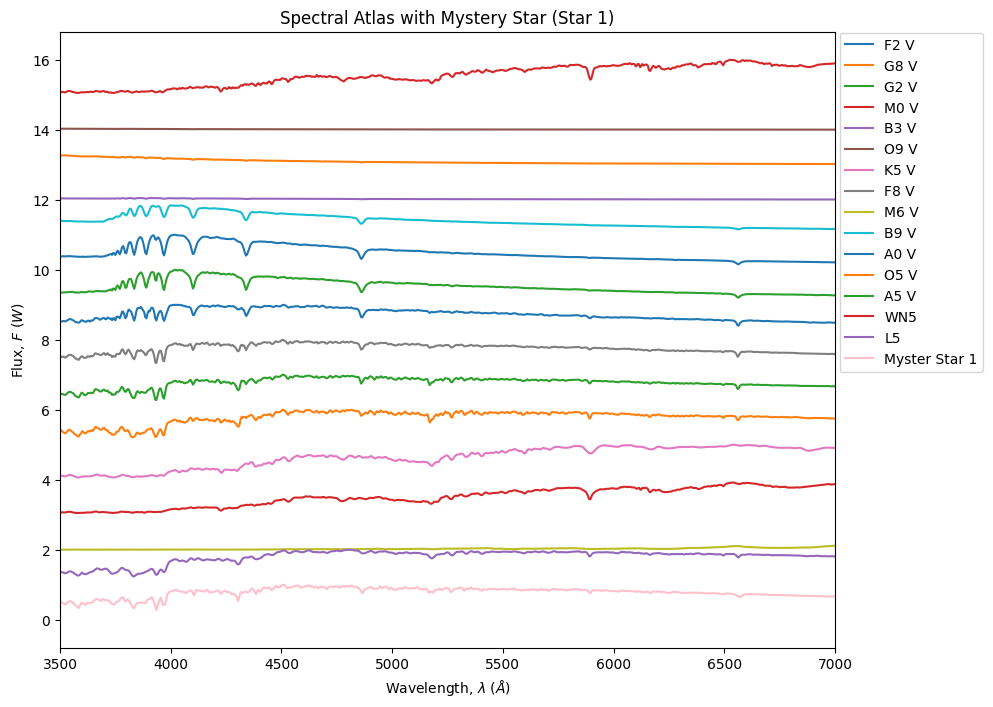

In [ ]:
# %% plot spectral atlas

figure_kwargs = dict(figsize=(10, 8))
fig2, axes2 = plt.subplots(**figure_kwargs)
for i, (key, data) in enumerate(spectral_atlas_spectra.items()):
    data["Flux"] = data["Flux"].apply(lambda x: x + spectral_types[i][0])
    axes2.plot(*tl.split(data), label=spectral_types[i][1])

axes2.set_xlim((3500, 7000))

# plotting my spectra on the spectral atlas
mystery_star_spectra = tl.normalize_spectra(
    tl.read_starfile(r"data/star1.dat", col_names="Wavelength Flux".split())
)

tl.plot_single_spectra(mystery_star_spectra, ax=axes2, label="Myster Star 1", c="pink")
axes2.legend(bbox_to_anchor=(1.20, 1.01), loc="upper right")
axes2.set_title("Spectral Atlas with Mystery Star (Star 1)")
axes2.set_ylabel(r"Flux, $F$ ($W$)")
axes2.set_xlabel(r"Wavelength, $\lambda$ ($\AA$)")
plt.show()

chi: 275110.5202964765, reduced chi: 190.5197508978369


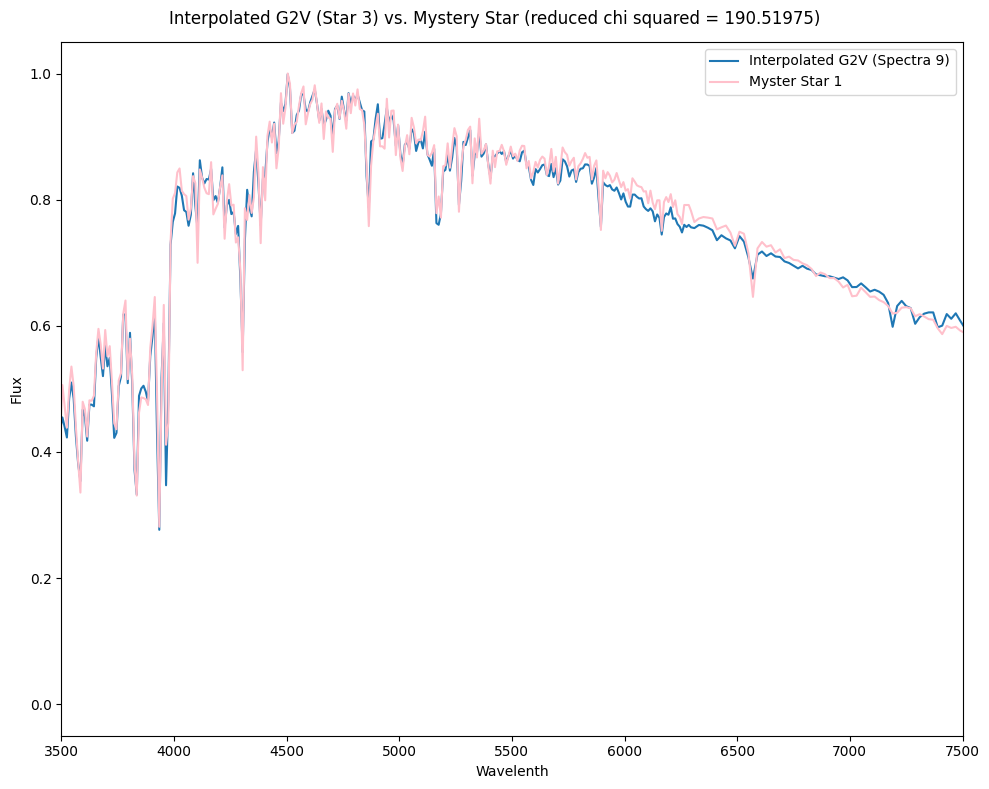

In [ ]:
# %% perform chi-squared analysis

interp_spec3, chi, reduced_chi = tl.chi_squared_analysis(
    mystery_star_spectra, spectral_atlas_spectra["spectra3"]
)
 # spectra 3 = G2V
print(f"chi: {chi}, reduced chi: {reduced_chi}")

# plotting the first spectral atlas interpolated data vs. interpolated mystery star
fig3, axes3 = plt.subplots(tight_layout=True, **figure_kwargs)
axes3.set_xlim((3500, 7500))
axes3.plot(interp_spec3["Wavelength"], interp_spec3["Flux"] - 6, label="Interpolated G2V (Spectra 9)")
tl.plot_single_spectra(mystery_star_spectra, ax=axes3, label="Myster Star 1", c="pink")
axes3.set_xlabel("Wavelenth")
axes3.set_ylabel("Flux")
fig3.suptitle(
    f"Interpolated G2V (Star 3) vs. Mystery Star (reduced chi squared = {reduced_chi:.5f})"
)

axes3.plot()
plt.show()

In [ ]:
# %% get chi-squared values for all spectral types:

all_interpolated_data = {}
for i, (key, spectral_atlas_spectra_key) in enumerate(spectral_atlas_spectra.items()):
    print(f"Calculating chi values for {key}")
    interpolated_data, chi, reduced_chi = tl.chi_squared_analysis(
        mystery_star_spectra, spectral_atlas_spectra_key
    )
    all_interpolated_data[key] = {
        "interpolation": interpolated_data,
        "spectral_type": spectral_types[i][1],
        "chi": chi,
        "reduced_chi": reduced_chi,
    }

all_interpolated_data["spectra2"].keys()

Calculating chi values for spectra1
Calculating chi values for spectra2
Calculating chi values for spectra3
Calculating chi values for spectra4
Calculating chi values for spectra5
Calculating chi values for spectra6
Calculating chi values for spectra7
Calculating chi values for spectra8
Calculating chi values for spectra9
Calculating chi values for spectra10
Calculating chi values for spectra11
Calculating chi values for spectra12
Calculating chi values for spectra13
Calculating chi values for spectra14
Calculating chi values for spectra15


dict_keys(['interpolation', 'spectral_type', 'chi', 'reduced_chi'])

In [ ]:
# %% print the table

# create the table data
table_info = []
for dicts in all_interpolated_data.values():
    table_info.append([dicts["spectral_type"], dicts["chi"], dicts["reduced_chi"]])

# print table
print(tabulate(table_info, headers=["Spectral Type", "Chi Squared Value with Respect to Mystery Star", "Reduced Chi Squared Value with Respect to Mystery Star"], tablefmt="grid"))

+-----------------+--------------------------------------------------+----------------------------------------------------------+
| Spectral Type   |   Chi Squared Value with Respect to Mystery Star |   Reduced Chi Squared Value with Respect to Mystery Star |
+=================+==================================================+==========================================================+
| F2 V            |                                 484071           |                                                335.229   |
+-----------------+--------------------------------------------------+----------------------------------------------------------+
| G8 V            |                                 192272           |                                                133.153   |
+-----------------+--------------------------------------------------+----------------------------------------------------------+
| G2 V            |                                 275111           |                    

In [ ]:
# %% read history of star (Sun)

sun_history = read_history("data/MESA-Web_Job_12052438098/trimmed_history.data")

#obtaining the information that will be used later from the history file
historyLum = sun_history["log_L"]
historyTeff = sun_history["log_Teff"]
historyRadius = sun_history["log_R"]
historyStarAge = sun_history["star_age"]
historyStarMass = sun_history["star_mass"]
historyCenterTemp = sun_history["log_center_T"]
historyNuclearTimescale = sun_history["nuc_timescale"]
historyPPcycle = sun_history["pp"]
historyCNOcycle = sun_history["cno"]

profile1_file = read_profile("data/MESA-Web_Job_12052438098/profile1.data")
profile2_file = read_profile("data/MESA-Web_Job_12052438098/profile2.data")
profile3_file = read_profile("data/MESA-Web_Job_12052438098/profile3.data")
profile4_file = read_profile("data/MESA-Web_Job_12052438098/profile4.data")
profile5_file = read_profile("data/MESA-Web_Job_12052438098/profile5.data")
profile6_file = read_profile("data/MESA-Web_Job_12052438098/profile6.data")

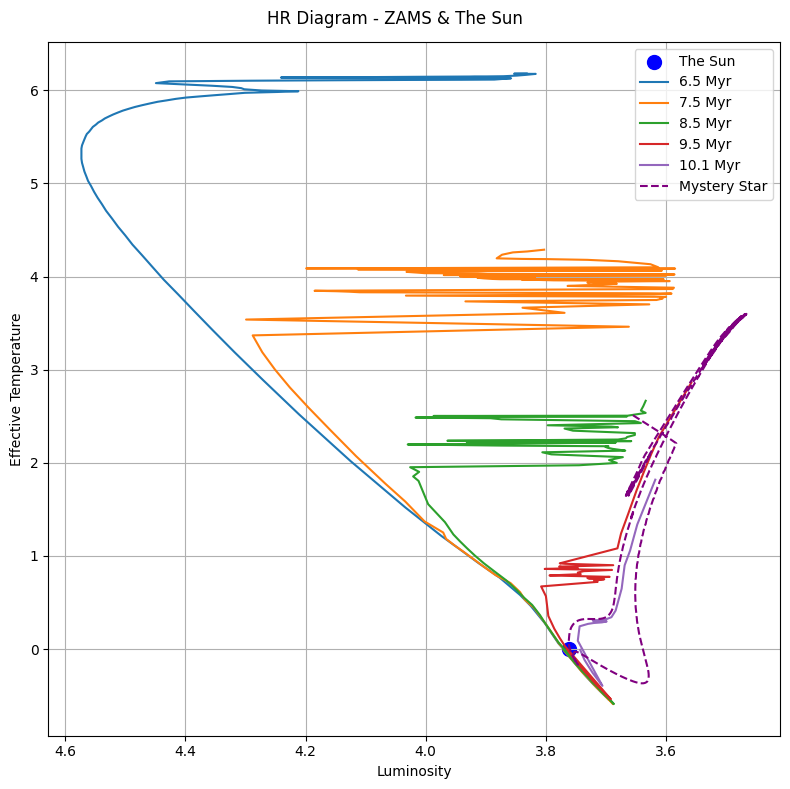

In [ ]:
# %% creating the HR diagram

read_kwargs = {"delim_whitespace": True, "comment": "#", "on_bad_lines": "skip"}
hr_files = tl.list_dir("data/hr-diagram/evolution_tracks")
hr_data = tl.read_data(*hr_files, columns=["logTe", "logL"], read_kwargs=read_kwargs)
tracks = ["6.5 Myr", "7.5 Myr", "8.5 Myr", "9.5 Myr", "10.1 Myr"]


# plot hr diagram zams
hr_diagram, hr_axes = plt.subplots(figsize=(8, 8), tight_layout=True)
hr_axes.scatter(3.761, 0, label="The Sun", color="blue", marker='o', s=100)
for i, data in enumerate(hr_data.values()):
    data = data.sort_values(by="logL")
    data = data.astype(np.float64)
    data = data.dropna()
    data = data.iloc[::10, :]
    hr_axes.plot(data["logTe"], data["logL"], label=tracks[i])

# plot my star on top of the HR diagram
hr_axes.plot(historyTeff, historyLum, label="Mystery Star", color="purple", linestyle="--")
hr_axes.set_xlabel("Luminosity")
hr_axes.set_ylabel("Effective Temperature")
hr_axes.invert_xaxis()
hr_diagram.suptitle("HR Diagram - ZAMS & The Sun")
hr_axes.grid()
hr_axes.legend()

plt.show()

In [ ]:
# %% calculating averages

def calculate_average(data):
  if len(data) > 0:
    return sum(data) / len(data)
  else:
    return "No values to calculate the average."

data_labels = [
  (historyLum, "Luminosity"),
  (historyTeff, "Effective Temperature"),
  (historyRadius, "Radius"),
  (historyStarAge, "Star Age"),
  (historyStarMass, "Star Mass"),
  (historyCenterTemp, "Center Temperature"),
  (historyNuclearTimescale, "Nuclear Timescale")
]

averages = {}
for data, label in data_labels:
  averages[label] = calculate_average(data)

print("Averages")
for key, val in averages.items():
    print(f"{key} average: ", val)

Averages
Luminosity average:  2.729591380866068
Effective Temperature average:  3.558074366263158
Radius average:  1.7719057943593357
Star Age average:  12057801874.554562
Star Mass average:  0.9640662402551676
Center Temperature average:  7.733931563953601
Nuclear Timescale average:  266033563.92854714
